In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
def load_scws(rid):
    print("loading "+rid+"...")
    df1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/"+rid+"_scw_envs_df.csv")
    
    df1["cluster_new"] = df1.cluster.map({0:2,2:1,1:0})
    df1 = df1.set_index(pd.DatetimeIndex(df1.dt_utc))
    df1["month"] = df1.index.month
    df1["hour"] = df1.index.hour
    df1["year"] = df1.index.year
    df1["aspect_ratio"] = df1.major_axis_length / df1.minor_axis_length    
    
    df1["rid"] = rid
    
    return df1#, df2

In [31]:
var = ["rid","qmean01","s06","lr13","Umean06","cluster_new"]
rids = ["68","64","8","72","75","19","73","78","49","4","40","48","2","66","69","70","71"]
scws = [load_scws(rid)[var] for rid in rids]
df_scw = pd.concat(scws,axis=0)

loading 68...
loading 64...
loading 8...
loading 72...
loading 75...
loading 19...
loading 73...
loading 78...
loading 49...
loading 4...
loading 40...
loading 48...
loading 2...
loading 66...
loading 69...
loading 70...
loading 71...


In [32]:
print("Tropical")
print(df_scw[np.in1d(df_scw.rid, ["63","72","75","19","73","78",'77'])].cluster_new.value_counts().sort_index())
print("Sub-tropical coastal")
print(df_scw[np.in1d(df_scw.rid, ["4","8","66","71"])].cluster_new.value_counts().sort_index())
print("Inland")
print(df_scw[np.in1d(df_scw.rid, ["48","49","69"])].cluster_new.value_counts().sort_index())
print("Mid-latitude coastal")
print(df_scw[np.in1d(df_scw.rid, ["70","2","68","64","76","40"])].cluster_new.value_counts().sort_index())

Tropical
1     3
2    27
Name: cluster_new, dtype: int64
Sub-tropical coastal
0    51
1    23
2    89
Name: cluster_new, dtype: int64
Inland
0    16
1    27
2    37
Name: cluster_new, dtype: int64
Mid-latitude coastal
0    217
1     61
2     22
Name: cluster_new, dtype: int64


Text(0.1, 0.9, 'b)')

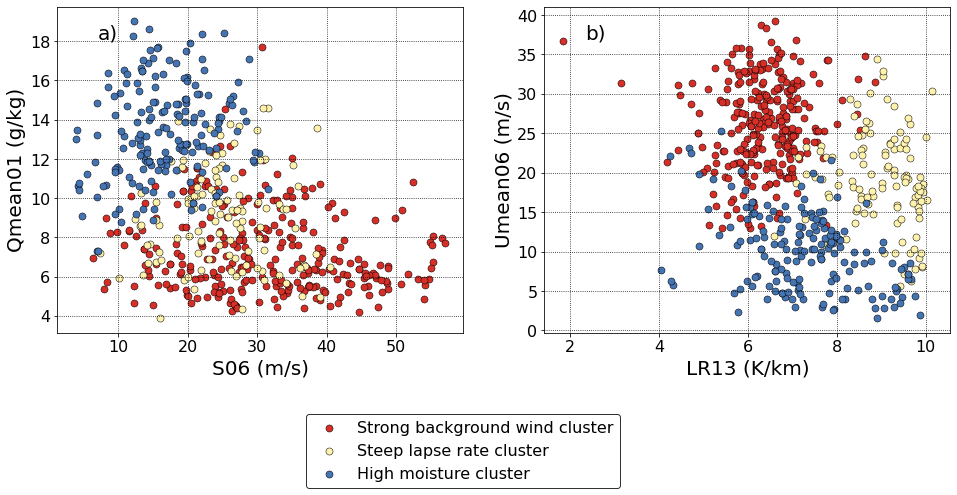

In [33]:
def get_2dhist(df):
    x_s06 = np.arange(0,42.5,2.5)
    y_qmean01 = np.arange(2,18,1)
    H1, xe_s06, ye_qmean01 = np.histogram2d(df.s06.values, df.qmean01.values, bins=[x_s06,y_qmean01],density=False)
    H1 = H1/(H1.sum()) * 100
    xc_s06 = np.array([(x_s06[i]+x_s06[i+1])/2 for i in np.arange(x_s06.shape[0]-1)])
    yc_qmean01 = np.array([(y_qmean01[i]+y_qmean01[i+1])/2 for i in np.arange(y_qmean01.shape[0]-1)])
    
    x_lr13 = np.arange(0,12,1)
    y_umean06 = np.arange(-2,27.5,2.5)
    H2, xe_lr13, ye_umean06 = np.histogram2d(df.lr13.values, df.Umean06.values, bins=[x_lr13,y_umean06],density=False)
    H2 = H2/(H2.sum()) * 100
    xc_lr13 = np.array([(x_lr13[i]+x_lr13[i+1])/2 for i in np.arange(x_lr13.shape[0]-1)])
    yc_umean06 = np.array([(y_umean06[i]+y_umean06[i+1])/2 for i in np.arange(y_umean06.shape[0]-1)])    
    
    return xc_s06, yc_qmean01, H1, xc_lr13, yc_umean06, H2



p=[plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]]
plt.figure(figsize=[16,6])


levs=np.arange(0.5,4,0.5)

plt.subplot(1,2,1)

plt.ylabel("Qmean01")
plt.xlabel("S06")


plt.scatter(df_scw.query("cluster_new==0").s06, df_scw.query("cluster_new==0").qmean01,color=p[0],marker="o",s=50,edgecolor="k",linewidths=0.5,label="Strong background wind cluster")
plt.scatter(df_scw.query("cluster_new==1").s06, df_scw.query("cluster_new==1").qmean01,color=p[1],marker="o",s=50,edgecolor="k",linewidths=0.5,label="Steep lapse rate cluster")
plt.scatter(df_scw.query("cluster_new==2").s06, df_scw.query("cluster_new==2").qmean01,color=p[2],marker="o",s=50,edgecolor="k",linewidths=0.5,label="High moisture cluster")
plt.gca().grid(color="k",ls=":")
plt.gca().tick_params("both",labelsize=16)
plt.gca().set_ylabel("Qmean01 (g/kg)",size=20)
plt.gca().set_xlabel("S06 (m/s)",size=20)
plt.gca().text(0.1,0.9,"a)",transform=plt.gca().transAxes,size=20)

l=plt.legend(loc=8,fontsize=16,bbox_to_anchor=(1,-0.5),edgecolor="k")


levs=np.arange(1,11,1.5)

plt.subplot(1,2,2)
plt.ylabel("Umean06")
plt.xlabel("LR13")

plt.scatter(df_scw.query("cluster_new==0").lr13, df_scw.query("cluster_new==0").Umean06,color=p[0],marker="o",s=50,edgecolor="k",linewidths=0.5)
plt.scatter(df_scw.query("cluster_new==1").lr13, df_scw.query("cluster_new==1").Umean06,color=p[1],marker="o",s=50,edgecolor="k",linewidths=0.5)
plt.scatter(df_scw.query("cluster_new==2").lr13, df_scw.query("cluster_new==2").Umean06,color=p[2],marker="o",s=50,edgecolor="k",linewidths=0.5)
plt.gca().grid(color="k",ls=":")
plt.gca().tick_params("both",labelsize=16)
plt.gca().set_ylabel("Umean06 (m/s)",size=20)
plt.gca().set_xlabel("LR13 (K/km)",size=20)
plt.gca().text(0.1,0.9,"b)",transform=plt.gca().transAxes,size=20)

#plt.savefig("/g/data/eg3/ab4502/ExtremeWind/systematic_clusters.jpeg",dpi=400,bbox_inches="tight")

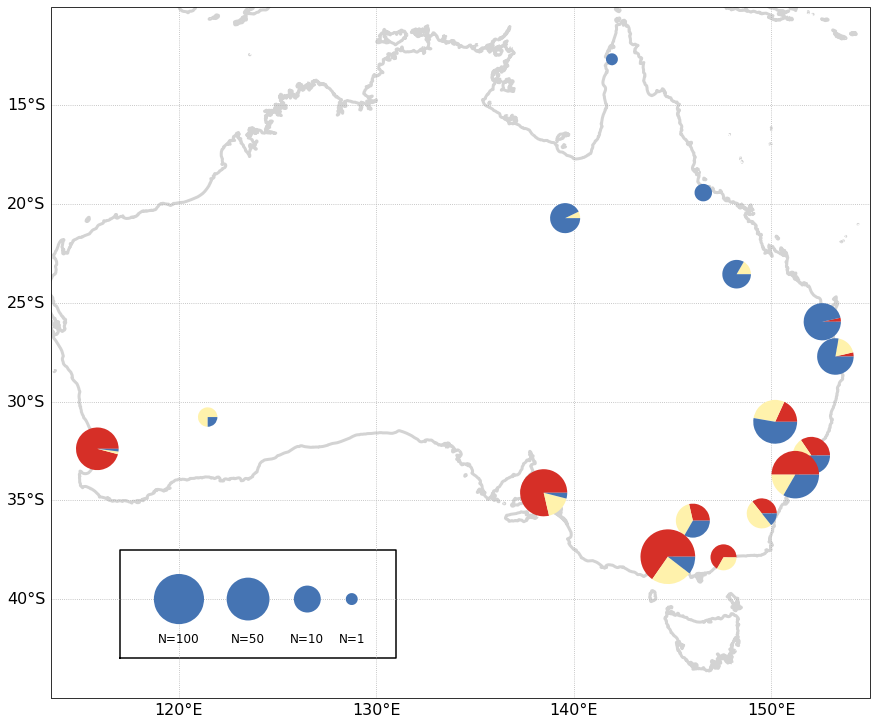

In [153]:
fig=plt.figure(figsize=[16,12])
ax0 = fig.add_axes([0.1,0.1,0.8,0.8],projection=ccrs.PlateCarree())
ax0.set_xlim([113.5,155])
ax0.set_ylim([-45,-10])
ax0.coastlines("10m",color="lightgray",lw=3)
g=ax0.gridlines(draw_labels=True,ylabel_style={"size":16},xlabel_style={"size":16},ls=":"); g.top_labels=False; g.right_labels=False

for rid in rids:
    f=xr.open_dataset(glob.glob("/g/data/rq0/level_2/"+rid+"/COLUMNMAXREFLECTIVITY/*.nc")[-1])
    lat0=f.attrs["origin_latitude"]
    lon0=f.attrs["origin_longitude"]   

    point = (lon0,lat0)
    trans = ax0.transData.transform(point)
    trans = ax0.transAxes.inverted().transform(trans)

    n_events = df_scw[df_scw.rid==rid].shape[0]
    #width_height = 0.08
    #width_height = n_events/153 * 0.1
    width_height = (np.log(n_events+2)/153) * 3
    
    if n_events > 0:
        ax1=ax0.inset_axes((trans[0]-(width_height/2),trans[1]-(width_height/2),
                            width_height,width_height),anchor="C")
        ax1.pie([(df_scw[df_scw.rid==rid].cluster_new == c).sum() for c in [0,1,2]],
               colors=p)
    else:
        pass

    

n_events = 100
point = (120,-40)
trans = ax0.transData.transform(point)
trans = ax0.transAxes.inverted().transform(trans)
width_height = (np.log(n_events+2)/153) * 3

ax1=ax0.inset_axes((trans[0]-(width_height/2),trans[1]-(width_height/2),
                    width_height,width_height),anchor="C")
ax1.pie([0,0,n_events],colors=p)
ax0.text(point[0],point[1]-2,"N=100",ha="center",va="center",size=12)

n_events = 50
point = (123.5,-40)
trans = ax0.transData.transform(point)
trans = ax0.transAxes.inverted().transform(trans)
width_height = (np.log(n_events+2)/153) * 3

ax1=ax0.inset_axes((trans[0]-(width_height/2),trans[1]-(width_height/2),
                    width_height,width_height),anchor="C")
ax1.pie([0,0,n_events],colors=p)
ax0.text(point[0],point[1]-2,"N=50",ha="center",va="center",size=12)

n_events = 10
point = (126.5,-40)
trans = ax0.transData.transform(point)
trans = ax0.transAxes.inverted().transform(trans)
width_height = (np.log(n_events+2)/153) * 3

ax1=ax0.inset_axes((trans[0]-(width_height/2),trans[1]-(width_height/2),
                    width_height,width_height),anchor="C")
ax1.pie([0,0,n_events],colors=p)
ax0.text(point[0],point[1]-2,"N=10",ha="center",va="center",size=12)

n_events = 1
point = (128.75,-40)
trans = ax0.transData.transform(point)
trans = ax0.transAxes.inverted().transform(trans)
width_height = (np.log(n_events+2)/153) * 3

ax1=ax0.inset_axes((trans[0]-(width_height/2),trans[1]-(width_height/2),
                    width_height,width_height),anchor="C")
ax1.pie([0,0,n_events],colors=p)
ax0.text(point[0],point[1]-2,"N=1",ha="center",va="center",size=12)

ax0.plot([117,117,131,131,117],[-43,-37.5,-37.5,-43,-43],color="k")